<h1><center>Laboratorio 10: Adivina, Adivinador 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Otoño 2025</strong></center>

### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Ignacio Negrete
- Nombre de alumno 2: Camila Salas

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/ignacio3645/MDS7202.git)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [1]:
# # Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
# try:
#     from google.colab import drive
#     drive.mount("/content/drive")
#     path = 'Dirección donde tiene los archivos en el Drive'
# except:
#     print('Ignorando conexión drive-colab')

In [2]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

In [3]:
#Codigo Aqui

## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

In [4]:
#CODIGO AQUI

## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

In [6]:
# # librerias extras
# from prophet import Prophet
# from prophet.plot import plot_plotly, plot_components_plotly

**Respuesta:**

In [7]:
#CODIGO AQUI

## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

In [8]:
#CODIGO AQUI

## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

In [9]:
#CODIGO AQUI

## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [ ]:
# #NO MODIFICAR ESTA CELDA

# import itertools
# import numpy as np
# import pandas as pd
# from tqdm import tqdm
# import logging

# # Silenciar el logging de Prophet
# logging.getLogger('prophet').setLevel(logging.ERROR)
# logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


# def optimize_prophet(df, df_to_pred, features, param_grid ):
#   '''
#   Función que recibe como entrada:
#   -df: data entrenamiento.
#   -df_to_pred: data a predecir (test).
#   -features: lista de variables exógenas.
#   -param_grid: grilla de hiperparámetros.

#   Retorna:
#   -tuning_results: Dataframe con resultados de la optimización.
#   -best_params: Diccionario de mejores parámetros encontrados.
#   '''

#   # Generate all combinations of parameters
#   all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
#   MAEs = []  # Store the MAEs for each params here

#   # Use tqdm to add a progress bar to the parameter tuning loop
#   for params in tqdm(all_params, desc="Tuning Prophet parameters"):
#       m = Prophet(**params)  # Fit model with given params
#       for feature in features:
#           m.add_regressor(feature)
#       m.fit(df)

#       # Prepare future dataframe
#       df_prop = m.make_future_dataframe(periods=len(df_to_pred))
#       df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
#       df_prop[features] = df_feat[features]

#       # Make predictions
#       forecast = m.predict(df_prop)
#       forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

#       # Calculate MAE for the predictions
#       mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
#       MAEs.append(mae_pred)

#   # Find the best parameters
#   tuning_results = pd.DataFrame(all_params)
#   tuning_results['MAEs'] = MAEs
#   tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
#   best_params = all_params[np.argmin(MAEs)]
#   return tuning_results, best_params

**Respuesta:**

In [11]:
#CODIGO AQUI

# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [12]:
# !pip install surprise

In [1]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from copy import deepcopy

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [2]:
df_cervezas = pd.read_csv('cervezas.csv')
df_cervezas

,userId,beerId,rating,beerName,beerStyle
0,144,995,3.0,Mai Bock,Maibock / Helles Bock
1,63,58695,4.0,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,147,4083,5.0,Stone Ruination IPA,American Double / Imperial IPA
3,4261,40310,3.0,Noël Des Géants,Herbed / Spiced Beer
4,140,1904,5.0,Sierra Nevada Celebration Ale,American IPA
...,...,...,...,...,...
295054,863,45653,4.0,Consecration,American Wild Ale
295055,306,1341,4.0,Keystone Light,Light Lager
295056,8,8917,3.0,Drop Top Amber,American Amber / Red Ale
295057,35,102,3.0,Samuel Adams Octoberfest,Märzen / Oktoberfest


## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

In [15]:
# Se obtiene una descripcion del df
df_cervezas.describe()

,userId,beerId,rating
count,295059.000000,295059.000000,295059.000000
mean,2201.510247,17498.665684,3.860367
std,4577.423286,19971.480254,0.702807
min,1.000000,5.000000,1.000000
25%,132.000000,1185.000000,3.500000
50%,293.000000,6314.000000,4.000000
75%,1141.000000,33639.000000,4.500000
max,27681.000000,75086.000000,5.000000


In [16]:
# Se obtienen cantidad usuarios en los datos
df_cervezas['userId'].nunique()

706

In [17]:
# Se obtienen cantidad de productos en los datos
df_cervezas['beerId'].nunique()

3747

In [18]:
# Se obtienen las calificaciones distintas
df_cervezas['rating'].unique()

array([3. , 4. , 5. , 3.5, 2. , 4.5, 2.5, 1. , 1.5])

In [19]:
# Se obtienen la cantidad de calificaciones distintas
df_cervezas['rating'].nunique()

9

In [20]:
# Las calificaciones faltantes soon
df_cervezas['rating'].isnull().sum()

0

In [21]:
# Se obtiene la media de los ratings segun producto
mean_prod = df_cervezas.groupby('beerId')['rating'].mean()
mean_prod

beerId
5        3.395000
6        3.765217
7        3.256849
9        3.478261
10       3.791908
           ...   
74827    4.100000
74904    3.896552
74986    4.274336
75013    4.242424
75086    3.753247
Name: rating, Length: 3747, dtype: float64

In [22]:
print(f'rating promedio más bajo {mean_prod.min()}')
print(f'rating promedio más alto: {mean_prod.max()}')   

rating promedio más bajo 1.376923076923077
rating promedio más alto: 4.669491525423729


* Respondiendo las preguntas:
    * Hay un total de 706 usuarios
    * Hay un total de 3747 productos
    * Hay un total de 9 calificaciones diferentes, ya que van desde el 1.0 al 5.0, pero hay casos en que los valores son 1.5, 2.5, 3.5 y 4.5
    * Según lo observado, no hay datos faltantes en el caso del rating de cervezas
    * La media de las calificaciones es 3.86 a nivel general, pero si se ve por producto, el rating promedio más bajo es 1.38 y el más alto es 4.67

In [3]:
# Se muestran los datos como matriz usuario-producto
matriz = df_cervezas.pivot_table(index='userId', columns='beerId', values='rating')
matriz

beerId,5,6,7,9,10,11,14,15,17,19,...,74491,74530,74548,74579,74634,74827,74904,74986,75013,75086
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.395,3.765217,3.256849,3.478261,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,3.791908,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,3.431818,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,3.892157,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero le quiere regalar un pack de distintas cervezas a Carl en agradecimiento a su ayuda anterior, el cual se enteró que Carl tiene un `userId = 100`. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Carl (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

In [4]:
# Se crea el df que contiene caracteristicas de las cervezas
df = df_cervezas[['beerId', 'beerName', 'beerStyle']].drop_duplicates().sort_values(by='beerId').reset_index()
df

,index,beerId,beerName,beerStyle
0,353,5,Amber,Vienna Lager
1,1279,6,Turbodog,English Brown Ale
2,1003,7,Purple Haze,Fruit / Vegetable Beer
3,901,9,Golden,American Pale Lager
4,2905,10,Allagash Dubbel Ale,Dubbel
...,...,...,...,...
3742,13514,74827,Lips Of Faith - Fresh Hop India Pale Ale,American IPA
3743,1809,74904,Allies Win The War!,English Strong Ale
3744,4585,74986,Lagunitas Sucks Holiday Ale,American Double / Imperial IPA
3745,3060,75013,Firestone 15 - Anniversary Ale,American Strong Ale


In [5]:
# Se implementa bag of words
vect = CountVectorizer(lowercase=True, stop_words='english', min_df=10) # se inicializa con minuscilas, eliminar stopwords y minimo aparece 10 veces
bow = vect.fit_transform(df['beerStyle']).toarray()
bow = pd.DataFrame(bow, columns=vect.get_feature_names_out())
bow 

,adjunct,ale,altbier,amber,american,apa,baltic,barleywine,beer,belgian,...,vienna,warmer,wee,weizenbock,wheat,wheatwine,wild,winter,witbier,zwickel
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3743,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3744,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3745,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Se obtiene similitud coseno
sc = pd.DataFrame(cosine_similarity(bow, bow))
sc

,0,1,2,3,4,5,6,7,8,9,...,3737,3738,3739,3740,3741,3742,3743,3744,3745,3746
0,1.000000,0.000000,0.0,0.408248,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.000000,0.0,0.000000,0.0,0.408248,0.333333,0.0,0.288675,0.0,...,0.288675,0.288675,0.000000,0.0,0.0,0.000000,0.666667,0.000000,0.333333,0.288675
2,0.000000,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.408248,0.000000,0.0,1.000000,0.0,0.000000,0.333333,0.0,0.577350,0.0,...,0.000000,0.288675,0.288675,0.0,0.0,0.408248,0.000000,0.288675,0.333333,0.288675
4,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742,0.000000,0.000000,0.0,0.408248,0.0,0.000000,0.000000,0.0,0.353553,0.0,...,0.000000,0.353553,0.707107,0.0,0.0,1.000000,0.000000,0.707107,0.408248,0.000000
3743,0.000000,0.666667,0.0,0.000000,0.0,0.408248,0.333333,0.0,0.288675,0.0,...,0.577350,0.288675,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.666667,0.577350
3744,0.000000,0.000000,0.0,0.288675,0.0,0.000000,0.000000,0.0,0.250000,0.0,...,0.000000,0.250000,1.000000,0.0,0.0,0.707107,0.000000,1.000000,0.288675,0.000000
3745,0.000000,0.333333,0.0,0.333333,0.0,0.408248,0.333333,0.0,0.577350,0.0,...,0.577350,0.577350,0.288675,0.0,0.0,0.408248,0.666667,0.288675,1.000000,0.577350


In [7]:
# Se crea una funcion que imprima el top 5 cervezas similares a Chocolate Porter, utilizando similitud coseno

def top5(df, beerName= 'Chocolate Porter', k=5):

    # Se obtiene el indice de esa cerveza
    idx = df[df['beerName'] == beerName].index[0]

    # Se ibtienen los valores de similitud coseno segun el indice que se encontro
    sc_values = list(enumerate(sc[idx]))

    # Se ordenan segun mayor a menor similitud
    orden = sorted(sc_values, key=lambda x: x[1], reverse=True) 

    # Se obtiene el valor de los k=5 mas similares
    top5 = orden[1:k+1]

    # Se ibtiene los indices de las cervezas del top 5
    idx_top5 = [i[0] for i in top5]

    return df['beerName'].iloc[idx_top5].values # se obtiene del df las cervezas segun el top5

In [8]:
# Se obtiene el top 5 de lo que viene predeterminado por la funcion
top5(df)

array(['Blackhook Porter', 'Anchor Porter', 'Coffeehouse Porter',
       "Drayman's Porter", 'Stone Smoked Porter'], dtype=object)

In [9]:
# Ahora, se obtiene la mejor cerveza evaluda por carl 
mc = df_cervezas[df_cervezas['userId'] == 100].sort_values(by='rating', ascending=False) # mejor cerveza
mc

,userId,beerId,rating,beerName,beerStyle
178444,100,325,4.5,McNeill's Firehouse Amber Ale,American Amber / Red Ale
44395,100,325,4.5,McNeill's Firehouse Amber Ale,American Amber / Red Ale
164471,100,325,4.5,McNeill's Firehouse Amber Ale,American Amber / Red Ale
118399,100,48798,4.5,McNeill's Warlord Imperial IPA,American Double / Imperial IPA
191517,100,325,4.5,McNeill's Firehouse Amber Ale,American Amber / Red Ale
...,...,...,...,...,...
193205,100,48798,2.5,McNeill's Warlord Imperial IPA,American Double / Imperial IPA
15773,100,1814,2.0,McNeill's Pullman's Porter,American Porter
265574,100,48798,2.0,McNeill's Warlord Imperial IPA,American Double / Imperial IPA
52025,100,1884,2.0,McNeill's Dead Horse IPA,English India Pale Ale (IPA)


In [10]:
# Y con la mejor cerveza, se busca un top 5
top5(df, beerName=mc['beerName'].values[0])

array(['Full Sail Amber', "McNeill's Firehouse Amber Ale", 'Grail Ale',
       'American Amber Ale', "Ruedrich's Red Seal Ale"], dtype=object)

## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

In [11]:
# Se transforma el df a formarto surprise
reader = Reader(rating_scale=(1,5))
df_ordenado = df_cervezas[['userId', 'beerId', 'rating']].copy()
dataset = Dataset.load_from_df(df_ordenado, reader)
dataset

* Importa el orden porque surprise espera recibir algo del estilo usuario-cosa-rating.

In [12]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data = dataset, test_size = 0.3, random_state = 42)

In [33]:
# Se genera el modelo KNN
model = KNNBasic(sim_options={
    "name": "cosine",
    "user_based": True, 
})

# Se entrena 
model.fit(trainset)

# Se generan las predicciones
pred = model.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [34]:
# Se obtiene el mae de las predicciones
mae(pred)

MAE:  0.4639


0.46391403718672464

In [35]:
# Se pasan a df las predicciones apra analizarlas
pred_df = pd.DataFrame(pred)
pred_df

,uid,iid,r_ui,est,details
0,1628,9755,4.5,4.200000,"{'actual_k': 40, 'was_impossible': False}"
1,187,601,2.0,3.825000,"{'actual_k': 40, 'was_impossible': False}"
2,112,409,3.0,3.862500,"{'actual_k': 40, 'was_impossible': False}"
3,738,5051,4.0,4.027027,"{'actual_k': 37, 'was_impossible': False}"
4,141,4394,4.0,3.887500,"{'actual_k': 40, 'was_impossible': False}"
...,...,...,...,...,...
88513,2681,48139,4.0,3.825000,"{'actual_k': 40, 'was_impossible': False}"
88514,1195,3349,3.0,3.585714,"{'actual_k': 35, 'was_impossible': False}"
88515,220,30228,4.0,3.878788,"{'actual_k': 33, 'was_impossible': False}"
88516,35,1193,4.0,3.837500,"{'actual_k': 40, 'was_impossible': False}"


* Si se observa el df de las predicciones, se puede notar como en algunos casos la predicción es bastante cercana a el valor real, como los valores estimados que se acercan bastante a 4.0, pero también se tienen estimaciones que resultaron ser, por ejemplo, iguales a 3.85 y en realidad eran 2.0. 

* Adicionalmente, se obtiene un mae igual a 0.46, lo cual es bajo, pero podría estár más cercano a 0.

In [ ]:
# Ahora se entrena KNN pero basado en productos
# Se genera el modelo KNN
model2 = KNNBasic(sim_options={
    "name": "cosine",
    "user_based": False, # Para que sea basado en productos
})

# Se entrena 
model2.fit(trainset)

# Se generan las predicciones
pred2 = model2.test(testset)

In [ ]:
# Se obtiene mae
mae(pred2)

MAE:  0.4640


0.46397672493546066

In [ ]:
# Se pasan a df las predicciones apra analizarlas de las nuevas predicciones
pred_df2 = pd.DataFrame(pred2)
pred_df2

,uid,iid,r_ui,est,details
0,1628,9755,4.5,4.200000,"{'actual_k': 40, 'was_impossible': False}"
1,187,601,2.0,3.825000,"{'actual_k': 40, 'was_impossible': False}"
2,112,409,3.0,3.862500,"{'actual_k': 40, 'was_impossible': False}"
3,738,5051,4.0,4.000615,"{'actual_k': 40, 'was_impossible': False}"
4,141,4394,4.0,3.887500,"{'actual_k': 40, 'was_impossible': False}"
...,...,...,...,...,...
88513,2681,48139,4.0,3.825000,"{'actual_k': 40, 'was_impossible': False}"
88514,1195,3349,3.0,3.585714,"{'actual_k': 35, 'was_impossible': False}"
88515,220,30228,4.0,3.875038,"{'actual_k': 40, 'was_impossible': False}"
88516,35,1193,4.0,3.837500,"{'actual_k': 40, 'was_impossible': False}"


* Ahora, el valor del mae es bastante similar al anterior, incluso considerando que ahora la predicción se realizó en base a los productos.

* En relación a ciertos ejemplos, los valores estimados son similares.

### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

In [ ]:
# Se entrena un modelo NMF
# Se genera el modelo NMF
modelNMF =NMF(random_state=42)

# Se entrena 
modelNMF.fit(trainset)

# Se generan las predicciones
predNMF = modelNMF.test(testset)

In [ ]:
# Se obtiene mae 
mae(predNMF)

MAE:  0.4826


0.48259310524680443

In [ ]:
# Se pasa a df 
pred_dfNMF = pd.DataFrame(predNMF)
pred_dfNMF

,uid,iid,r_ui,est,details
0,1628,9755,4.5,3.682730,{'was_impossible': False}
1,187,601,2.0,3.714152,{'was_impossible': False}
2,112,409,3.0,3.973135,{'was_impossible': False}
3,738,5051,4.0,3.767895,{'was_impossible': False}
4,141,4394,4.0,3.910392,{'was_impossible': False}
...,...,...,...,...,...
88513,2681,48139,4.0,3.839448,{'was_impossible': False}
88514,1195,3349,3.0,3.535059,{'was_impossible': False}
88515,220,30228,4.0,3.871429,{'was_impossible': False}
88516,35,1193,4.0,3.672390,{'was_impossible': False}


* Al entrenar el modelo NMF se puede notar como el valor de mae aumenta, por lo que las predicciones no son tan buenas como cuando se utilizó KNN, pudiendo notarlo también en las estimaciones, ya que en muchos casos los valores estimados se alejaron de los reales.

In [13]:
# Se entrena un modelo SVD 
modelSVD = SVD(random_state=42)

# Se entrena 
modelSVD.fit(trainset)

# Se generan las predicciones
predSVD = modelSVD.test(testset)

In [14]:
# Se calcula el mae
mae(predSVD)

MAE:  0.4610


0.4610339636110489

In [15]:
# Se obtiene como df
pred_dfSVD = pd.DataFrame(predSVD)
pred_dfSVD

,uid,iid,r_ui,est,details
0,1628,9755,4.5,4.022229,{'was_impossible': False}
1,187,601,2.0,3.807105,{'was_impossible': False}
2,112,409,3.0,3.885699,{'was_impossible': False}
3,738,5051,4.0,4.014968,{'was_impossible': False}
4,141,4394,4.0,3.926274,{'was_impossible': False}
...,...,...,...,...,...
88513,2681,48139,4.0,3.934257,{'was_impossible': False}
88514,1195,3349,3.0,3.584511,{'was_impossible': False}
88515,220,30228,4.0,3.872174,{'was_impossible': False}
88516,35,1193,4.0,3.901377,{'was_impossible': False}


* Si se compara el rendimiento de ambos modelos, de primeras, el que obtiene menor mae es SVD, por lo que entre los dos el mejor es este, además, si se observan las predicciones en los distintos casos, se puede notar como el valor estimado se acerca más al real. 

## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Carl (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Carl, para estimar las calificaciones que Carl podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]



In [16]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

In [17]:
# Se define la funcion get_top_n

def get_top_n(predicciones, N):

    # Se eliminan los duplicados
    pred = predicciones.drop_duplicates(subset=['uid', 'iid'])

    # Se genera un diccionario con las predicciones 
    top_n = defaultdict(list)
    for i in pred.itertuples(index=False):
        top_n[i.uid].append((i.iid, i.est))

    # Ahora, se ordenan las predicciones por usuario
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:N]

    return top_n

In [18]:
# Se obtienen las mejores 3 cervezas para Carl
top3 = get_top_n(pred_dfSVD, 3)
top3[100]

[(325, 3.941802288645008),
 (1393, 3.926976399705735),
 (1884, 3.7638289292285254)]

In [19]:
# Se realizan predicciones para 5 cervezas que no hayan sido evaludas por Carl
# Se obtienen las cervezas evaluadas por Carl 
cervezasCarl = df_cervezas[df_cervezas['userId'] == 100]['beerId'].unique()
cervezasCarl.tolist()

[1884, 1814, 1393, 325, 48798]

In [20]:
# Ahora obtenemos las cervezas que no fueron evaluadas por carl 
cervezas_totales = df_cervezas['beerId'].unique().tolist()
cervezas_noCarl = list(set(cervezas_totales) - set(cervezasCarl))
cervezas_noCarl

[16385,
 5,
 6,
 7,
 40968,
 65545,
 9,
 10,
 40970,
 8205,
 11,
 14,
 16400,
 17,
 15,
 16403,
 19,
 23,
 24,
 26,
 40988,
 30,
 31,
 32,
 33,
 34,
 8224,
 36,
 40999,
 39,
 41002,
 16429,
 41006,
 41009,
 65586,
 41010,
 52,
 41012,
 54,
 16439,
 56,
 55,
 58,
 59,
 16441,
 61,
 41019,
 63,
 42346,
 65,
 66,
 67,
 69,
 72,
 73,
 74,
 24651,
 41037,
 78,
 79,
 80,
 81,
 82,
 83,
 41043,
 85,
 86,
 87,
 88,
 89,
 90,
 16471,
 92,
 93,
 8280,
 8278,
 96,
 97,
 99,
 100,
 101,
 102,
 103,
 104,
 8297,
 8294,
 16487,
 108,
 111,
 114,
 115,
 116,
 117,
 120,
 8312,
 16506,
 57466,
 16509,
 125,
 49279,
 57471,
 129,
 8322,
 131,
 132,
 49283,
 49286,
 32903,
 134,
 135,
 138,
 139,
 16520,
 141,
 142,
 140,
 73864,
 145,
 146,
 49299,
 148,
 147,
 149,
 41110,
 151,
 153,
 155,
 8348,
 156,
 32926,
 158,
 157,
 41121,
 8353,
 159,
 161,
 41127,
 171,
 49324,
 32941,
 24751,
 176,
 178,
 179,
 181,
 182,
 24759,
 184,
 185,
 186,
 188,
 192,
 193,
 41154,
 195,
 196,
 197,
 198,
 199,
 493

In [21]:
# Se obtiene el df
df_noCarl = df_cervezas[df_cervezas['beerId'].isin(cervezas_noCarl)].sample(n=5)
df_noCarl

,userId,beerId,rating,beerName,beerStyle
159714,220,49789,4.0,A Little Sumpin' Sumpin' Ale,American Pale Wheat Ale
152062,1549,2778,3.5,Kilgubbin Red Ale,Irish Red Ale
90068,5074,34034,3.5,Conductor Imperial India Pale Ale,American Double / Imperial IPA
173886,863,7971,4.5,Pliny The Elder,American Double / Imperial IPA
229553,257,718,4.0,Steel Reserve 211 (High Gravity),American Malt Liquor


In [22]:
# Se obtiene la prediccion de 5
modelSVD.test(df_noCarl[['userId', 'beerId', 'rating']].values)

[Prediction(uid=220.0, iid=49789.0, r_ui=4.0, est=4.230978571456242, details={'was_impossible': False}),
 Prediction(uid=1549.0, iid=2778.0, r_ui=3.5, est=3.884989000647491, details={'was_impossible': False}),
 Prediction(uid=5074.0, iid=34034.0, r_ui=3.5, est=3.8510847245638886, details={'was_impossible': False}),
 Prediction(uid=863.0, iid=7971.0, r_ui=4.5, est=4.567818949368939, details={'was_impossible': False}),
 Prediction(uid=257.0, iid=718.0, r_ui=4.0, est=2.6863856769596435, details={'was_impossible': False})]

* Ahí se muestran las predicciones que se harían para 5 cervezas que no haya evaluado Carl.

In [23]:
# Ahors se calcula precision y recall
precisions, recalls = precision_recall_at_k(pred_dfSVD.values)

In [24]:
# Se obtiene el promedio 
prec_mean = 0
recall_mean = 0
largo = len(precisions)
for i in precisions:
    prec_mean+= precisions[i]
    recall_mean+= recalls[i]

prec_mean = prec_mean/largo
recall_mean = recall_mean/largo

In [25]:
print(f'Promedio de precision: {prec_mean}')
print(f'Promedio de recall: {recall_mean}')

Promedio de precision: 0.7433309726156743
Promedio de recall: 0.3398682151789204


* Es un modelo que obtiene un alto valor de precision, pero un bajo valor de recall, por lo que hay muchas recomendaciones que son relevantes que no se están considerando, aún cuando del total de recomendadas la mayoría fue relevante.

In [26]:
# Ahora se mueve el k entre 3 y 25
precisions_list = []
recalls_list = []
for k in range(3, 25, 1):
    precisions, recalls = precision_recall_at_k(pred_dfSVD.values, k=k)
    prec_mean = 0
    recall_mean = 0
    largo = len(precisions)
    for i in precisions:
        prec_mean+= precisions[i]
        recall_mean+= recalls[i]

    prec_mean = prec_mean/largo
    recall_mean = recall_mean/largo

    # Se agrega a la lista
    precisions_list.append(prec_mean)
    recalls_list.append(recall_mean)



[]

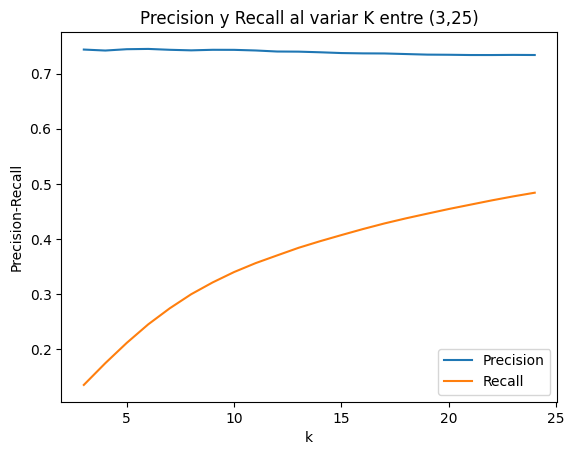

In [31]:
# Se grafican 
import matplotlib.pyplot as plt
plt.plot(range(3,25,1), precisions_list, label='Precision')
plt.plot(range(3,25,1), recalls_list, label='Recall')
plt.xlabel('k')
plt.ylabel('Precision-Recall')
plt.title('Precision y Recall al variar K entre (3,25)')
plt.legend()
plt.plot()

* Si se observan las curvas, al aumentar k precision no varía en gran medida, pero recall si lo hace, por lo que es un indicio de que podría ser una buena idea aumentar k, ya que se están considerando más recomendaciones relevantes.

In [39]:
# Ahora se varia el threshold entre 3 y 4.5 entre 0.1 pasos
import numpy as np
precisions_list_t = []
recalls_list_t = []
for t in np.arange(3.0, 4.5, 0.1):
    precisions, recalls = precision_recall_at_k(pred_dfSVD.values, threshold=t)
    prec_mean = 0
    recall_mean = 0
    largo = len(precisions)
    for i in precisions:
        prec_mean+= precisions[i]
        recall_mean+= recalls[i]

    prec_mean = prec_mean/largo
    recall_mean = recall_mean/largo

    # Se agrega a la lista
    precisions_list_t.append(prec_mean)
    recalls_list_t.append(recall_mean)


[]

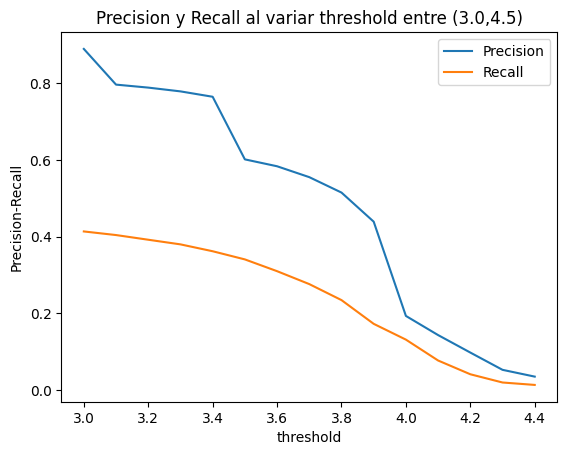

In [49]:
# Se grafican 
import matplotlib.pyplot as plt
plt.plot(np.arange(3.0, 4.5, 0.1), precisions_list_t, label='Precision')
plt.plot(np.arange(3.0, 4.5, 0.1), recalls_list_t, label='Recall')
plt.xlabel('threshold')
plt.ylabel('Precision-Recall')
plt.title('Precision y Recall al variar threshold entre (3.0,4.5)')
plt.legend()
plt.plot()

* A diferencia del gráfico anterior, ahora al aumentar el valor del threshold empeoran ambas métricas, por lo que entre menor este valor, mejor resulta.

In [ ]:
# Por último se rellenan los valores faltantes 
full_trainset = dataset.build_full_trainset() 
missing_ratings = full_trainset.build_anti_testset()
valores_fpred = modelSVD.test(missing_ratings) 
valores_fpred_df = pd.DataFrame(valores_fpred, columns=['uid', 'iid', 'r_ui', 'est', 'details'])
valores_fpred_df

,uid,iid,r_ui,est,details
0,144,58695,3.860367,3.622858,{'was_impossible': False}
1,144,4083,3.860367,3.842587,{'was_impossible': False}
2,144,40310,3.860367,3.636771,{'was_impossible': False}
3,144,1904,3.860367,3.919137,{'was_impossible': False}
4,144,409,3.860367,3.754595,{'was_impossible': False}
...,...,...,...,...,...
2641630,1503,4957,3.860367,3.984750,{'was_impossible': False}
2641631,1503,47589,3.860367,3.876316,{'was_impossible': False}
2641632,1503,62792,3.860367,3.671455,{'was_impossible': False}
2641633,1503,18432,3.860367,3.474833,{'was_impossible': False}


In [47]:
matriz_faltantes = valores_fpred_df.pivot_table(index='uid', columns='iid', values='est')
matriz_faltantes

iid,5,6,7,9,10,11,14,15,17,19,...,74491,74530,74548,74579,74634,74827,74904,74986,75013,75086
uid,,,,,,,,,,,,,,,,,,,,,
1,3.771808,3.971141,3.720676,3.882143,3.757660,3.723489,3.813681,3.840708,3.728672,3.985592,...,3.587676,4.142827,3.990992,4.050867,3.790383,4.175916,3.981260,4.187947,3.899217,3.686864
3,NaN,NaN,NaN,NaN,3.471261,3.414303,3.587438,3.534744,3.423763,3.688587,...,3.531858,3.825967,3.692859,3.765650,3.477968,3.811777,3.719317,3.884757,3.715269,3.474741
4,3.803890,4.098655,3.708163,3.970690,NaN,3.795536,3.981101,3.957826,3.815549,4.054364,...,3.865464,4.215030,4.142220,4.155620,3.882798,4.186915,4.086380,4.273647,4.092606,3.857886
5,3.716707,4.018249,3.625999,3.769685,3.614239,NaN,3.911910,3.869923,3.734197,3.954165,...,3.776573,3.856724,3.982870,4.024941,3.862496,3.966164,3.837241,4.256206,4.053245,3.799096
6,3.776749,4.029568,3.609475,3.768090,3.663695,3.719147,NaN,3.814215,3.736291,3.965483,...,3.773017,4.075850,4.090411,4.015704,3.892125,4.172056,3.876856,4.124729,3.903849,3.739774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24903,3.722644,4.156367,3.635887,3.959196,3.841686,3.699447,4.148890,3.942243,3.907713,4.091271,...,3.980179,4.354890,4.153837,4.075623,4.045296,4.161901,4.090026,4.306220,4.194676,3.884057
25317,3.660585,3.916278,3.449406,3.910417,3.650534,3.568596,3.770692,3.663807,3.472107,3.925274,...,3.603331,3.732956,3.963005,4.103263,3.671351,3.970637,3.815438,3.960868,3.822940,3.514539
25923,3.672276,4.108759,3.625099,4.080329,3.855773,3.834047,3.930379,4.049954,3.870837,4.155236,...,3.947700,4.175097,4.127497,4.084061,3.977139,4.149321,4.017591,4.273085,4.119619,3.956008


In [ ]:
# Se rellenan los nans con los valores que se tenían en la matriz creada originalmente
matriz_final = matriz.combine_first(matriz_faltantes)
matriz_final

,5,6,7,9,10,11,14,15,17,19,...,74491,74530,74548,74579,74634,74827,74904,74986,75013,75086
userId,,,,,,,,,,,,,,,,,,,,,
1,3.771808,3.971141,3.720676,3.882143,3.757660,3.723489,3.813681,3.840708,3.728672,3.985592,...,3.587676,4.142827,3.990992,4.050867,3.790383,4.175916,3.981260,4.187947,3.899217,3.686864
3,3.395000,3.765217,3.256849,3.478261,3.471261,3.414303,3.587438,3.534744,3.423763,3.688587,...,3.531858,3.825967,3.692859,3.765650,3.477968,3.811777,3.719317,3.884757,3.715269,3.474741
4,3.803890,4.098655,3.708163,3.970690,3.791908,3.795536,3.981101,3.957826,3.815549,4.054364,...,3.865464,4.215030,4.142220,4.155620,3.882798,4.186915,4.086380,4.273647,4.092606,3.857886
5,3.716707,4.018249,3.625999,3.769685,3.614239,3.431818,3.911910,3.869923,3.734197,3.954165,...,3.776573,3.856724,3.982870,4.024941,3.862496,3.966164,3.837241,4.256206,4.053245,3.799096
6,3.776749,4.029568,3.609475,3.768090,3.663695,3.719147,3.892157,3.814215,3.736291,3.965483,...,3.773017,4.075850,4.090411,4.015704,3.892125,4.172056,3.876856,4.124729,3.903849,3.739774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24903,3.722644,4.156367,3.635887,3.959196,3.841686,3.699447,4.148890,3.942243,3.907713,4.091271,...,3.980179,4.354890,4.153837,4.075623,4.045296,4.161901,4.090026,4.306220,4.194676,3.884057
25317,3.660585,3.916278,3.449406,3.910417,3.650534,3.568596,3.770692,3.663807,3.472107,3.925274,...,3.603331,3.732956,3.963005,4.103263,3.671351,3.970637,3.815438,3.960868,3.822940,3.514539
25923,3.672276,4.108759,3.625099,4.080329,3.855773,3.834047,3.930379,4.049954,3.870837,4.155236,...,3.947700,4.175097,4.127497,4.084061,3.977139,4.149321,4.017591,4.273085,4.119619,3.956008


# Conclusión

Éxito!
<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
